In [21]:
from zlib import crc32
import numpy as np

if __name__=='__main__':
    mail = input('enter phystech e-mail\n') 
    to_hash =  mail.strip().split('@')[0]    
    h = crc32(to_hash.encode('utf-8'))
    seed = h%(2**32-1)
    rs = np.random.RandomState(seed)
    task1 = rs.randint(low=1, high=5)
    task2 = rs.randint(low=1, high=5)
    task3 = rs.randint(low=1, high=5)
    task4 = rs.randint(low=1, high=4)
    print ('Your tasks are 1.{}, 2.{}, 3.{}, 4.{}'.format(task1, task2, task3, task4))

enter phystech e-mail
markin.vo@phystech.edu
Your tasks are 1.1, 2.4, 3.2, 4.3


In [0]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sns
import pandas as pd

In [0]:
import statsmodels.stats.diagnostic as d


# Task 1

Проверить мощность и консервативность критериев Лиллиефорса, Харке-Бера, Шапиро-Улика для выборок из следующих распределений:
1. Нормальное
2. Лапласа
3. Стьюдента
4. Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2)

Критерий консервативен — истинная вероятность ошибки первого рода ограничена уровнем значимости сверху

In [25]:
np.random.seed(42)
normal = np.random.normal(0, 1, 10)
laplace = np.random.laplace(0,1, 10000)
s = np.random.standard_t(10, 1000)

d.lilliefors(laplace, 'norm')

(0.06368627893986553, 1.7039160887030634e-108)

In [26]:
p = []
for i in range(1000):
            normal = np.random.normal(0, 1, 100)
            p_value = d.lilliefors(normal, 'norm')[1]
            if p_value > 0.05:
                p.append(1)
            else:
                p.append(0)
power = sum(p)/len(p) * 100
print("Мощность критерия Лиллиефорса {}".format(power))

Мощность критерия Лиллиефорса 94.19999999999999


In [0]:
def conduct_one_test(dist_function):
  p_value_jb = st.jarque_bera(dist_function)[1]
  p_value_sw = st.shapiro(dist_function)[1]
  p_value_l = st.kstest(dist_function, 'norm')[1]
  return p_value_jb, p_value_sw, p_value_l

In [0]:
def calculate_power(label, n, N):
  

  p_jb = []
  p_sw = []
  p_l = []
  for i in range(N):
    if label == 'normal':
      dist_function = np.random.normal(0, 1, n)
    elif label == 'laplace':
      dist_function = np.random.laplace(0, 1, n)
    elif label =="student":
      dist_function = np.random.standard_t(10, n)
    elif label == 'truncnorm':
      dist_function = st.truncnorm.rvs(-2, 2, size=n)
    p_value_jb, p_value_sw, p_value_l = conduct_one_test(dist_function)
    p_jb.append(p_value_jb)
    p_sw.append(p_value_sw)
    p_l.append(p_value_l)

                
        
  #print(p_jb)              
  power_jb= 1 - sum([1. if p>0.05 else 0. for p in p_jb])/len(p_jb) 
  power_sw = 1 - sum([1. if p>0.05 else 0. for p in p_sw])/len(p_sw) 
  power_l = 1 - sum([1. if p>0.05 else 0. for p in p_l])/len(p_l) 
                        
  
  return (label, [('Jarque-Bera',power_jb), ('Lilliefors',power_l), ('Shapiro-Wilk',power_sw)] )

In [15]:
N = 300
conservatism_normal = []
power_laplace = []
power_student = []
power_truncnormal = []

for n in range(10, 10001, 1000):
    conservatism_normal.append(calculate_power('normal', n, N)[1])
    power_laplace.append(calculate_power('laplace', n, N)[1])
    power_student.append(calculate_power('student', n, N)[1])
    power_truncnormal.append(calculate_power('truncnorm', n, N)[1])
    

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


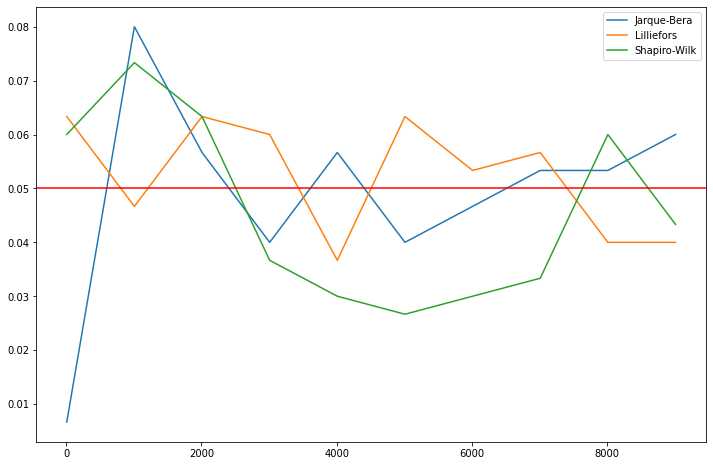

In [16]:
Jarque_Bera_normal = [conservatism_normal[i][0][1]for i in range(len(conservatism_normal))]
Lilliefors_normal = [conservatism_normal[i][1][1]for i in range(len(conservatism_normal))]
Shapiro_Wilk_normal = [conservatism_normal[i][2][1]for i in range(len(conservatism_normal))]
plt.figure(figsize = (12, 8))
plt.plot(range(10, 10001, 1000) , Jarque_Bera_normal, label = 'Jarque-Bera')
plt.plot(range(10, 10001, 1000) , Lilliefors_normal, label = 'Lilliefors')
plt.plot(range(10, 10001, 1000) , Shapiro_Wilk_normal, label = 'Shapiro-Wilk')
plt.axhline(0.05, color = 'red')
plt.legend()
plt.show()

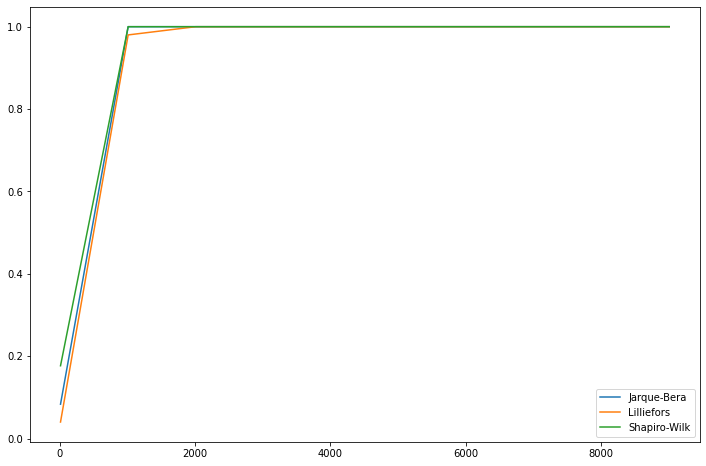

In [18]:
Jarque_Bera_laplace = [power_laplace[i][0][1]for i in range(len(power_laplace))]
Lilliefors_laplace = [power_laplace[i][1][1]for i in range(len(power_laplace))]
Shapiro_Wilk_laplace = [power_laplace[i][2][1]for i in range(len(power_laplace))]
plt.figure(figsize = (12, 8))
plt.plot(range(10, 10001, 1000) , Jarque_Bera_laplace, label = 'Jarque-Bera')
plt.plot(range(10, 10001, 1000) , Lilliefors_laplace, label = 'Lilliefors')
plt.plot(range(10, 10001, 1000) , Shapiro_Wilk_laplace, label = 'Shapiro-Wilk')
plt.legend()
plt.show()

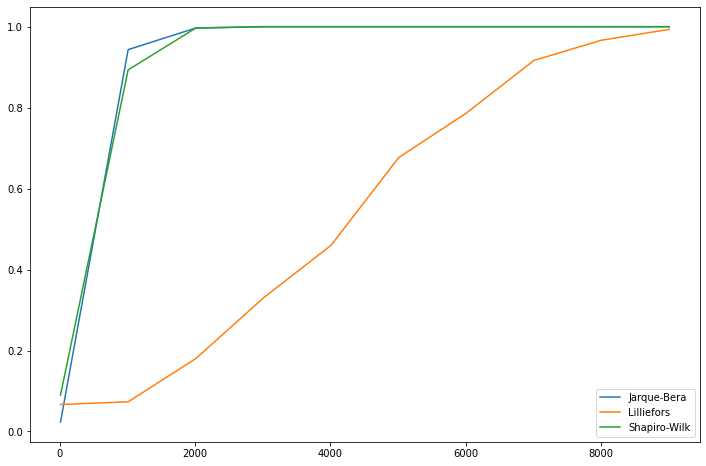

In [19]:
Jarque_Bera_student = [power_student[i][0][1]for i in range(len(power_student))]
Lilliefors_student = [power_student[i][1][1]for i in range(len(power_student))]
Shapiro_Wilk_student = [power_student[i][2][1]for i in range(len(power_student))]
plt.figure(figsize = (12, 8))
plt.plot(range(10, 10001, 1000) , Jarque_Bera_student, label = 'Jarque-Bera')
plt.plot(range(10, 10001, 1000) , Lilliefors_student, label = 'Lilliefors')
plt.plot(range(10, 10001, 1000) , Shapiro_Wilk_student, label = 'Shapiro-Wilk')
plt.legend()
plt.show()

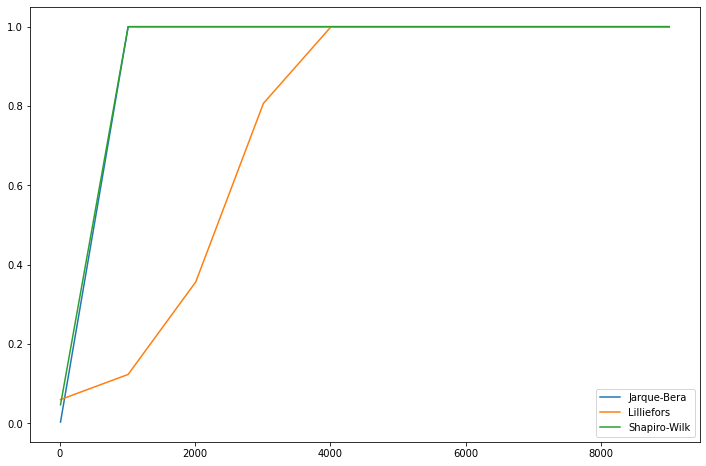

In [20]:
Jarque_Bera_truncnormal = [power_truncnormal[i][0][1]for i in range(len(power_truncnormal))]
Lilliefors_truncnormal = [power_truncnormal[i][1][1]for i in range(len(power_truncnormal))]
Shapiro_Wilk_truncnormal = [power_truncnormal[i][2][1]for i in range(len(power_truncnormal))]
plt.figure(figsize = (12, 8))
plt.plot(range(10, 10001, 1000) , Jarque_Bera_truncnormal, label = 'Jarque-Bera')
plt.plot(range(10, 10001, 1000) , Lilliefors_truncnormal, label = 'Lilliefors')
plt.plot(range(10, 10001, 1000) , Shapiro_Wilk_truncnormal, label = 'Shapiro-Wilk')
plt.legend()
plt.show()

##Выводы:
Критерий Лиллиефорса показал себя хуже всех. Это объясняется тем, что он не чувствителен к различиям на хвостах распределений.
Поэтому стоит рассматривать критерий Харке-Бера и критреий Шапиро-Уилка. Критерий Шапиро-Уилка мощнее, чем Харке-Бера, для усеченного нормального и Лапласа, для стьюдента все наоборот. Теоретически, Шапиро-Уилка -наиболее мощный критерий и лушчий в плане консервативности(судя по моим экспериментам).
